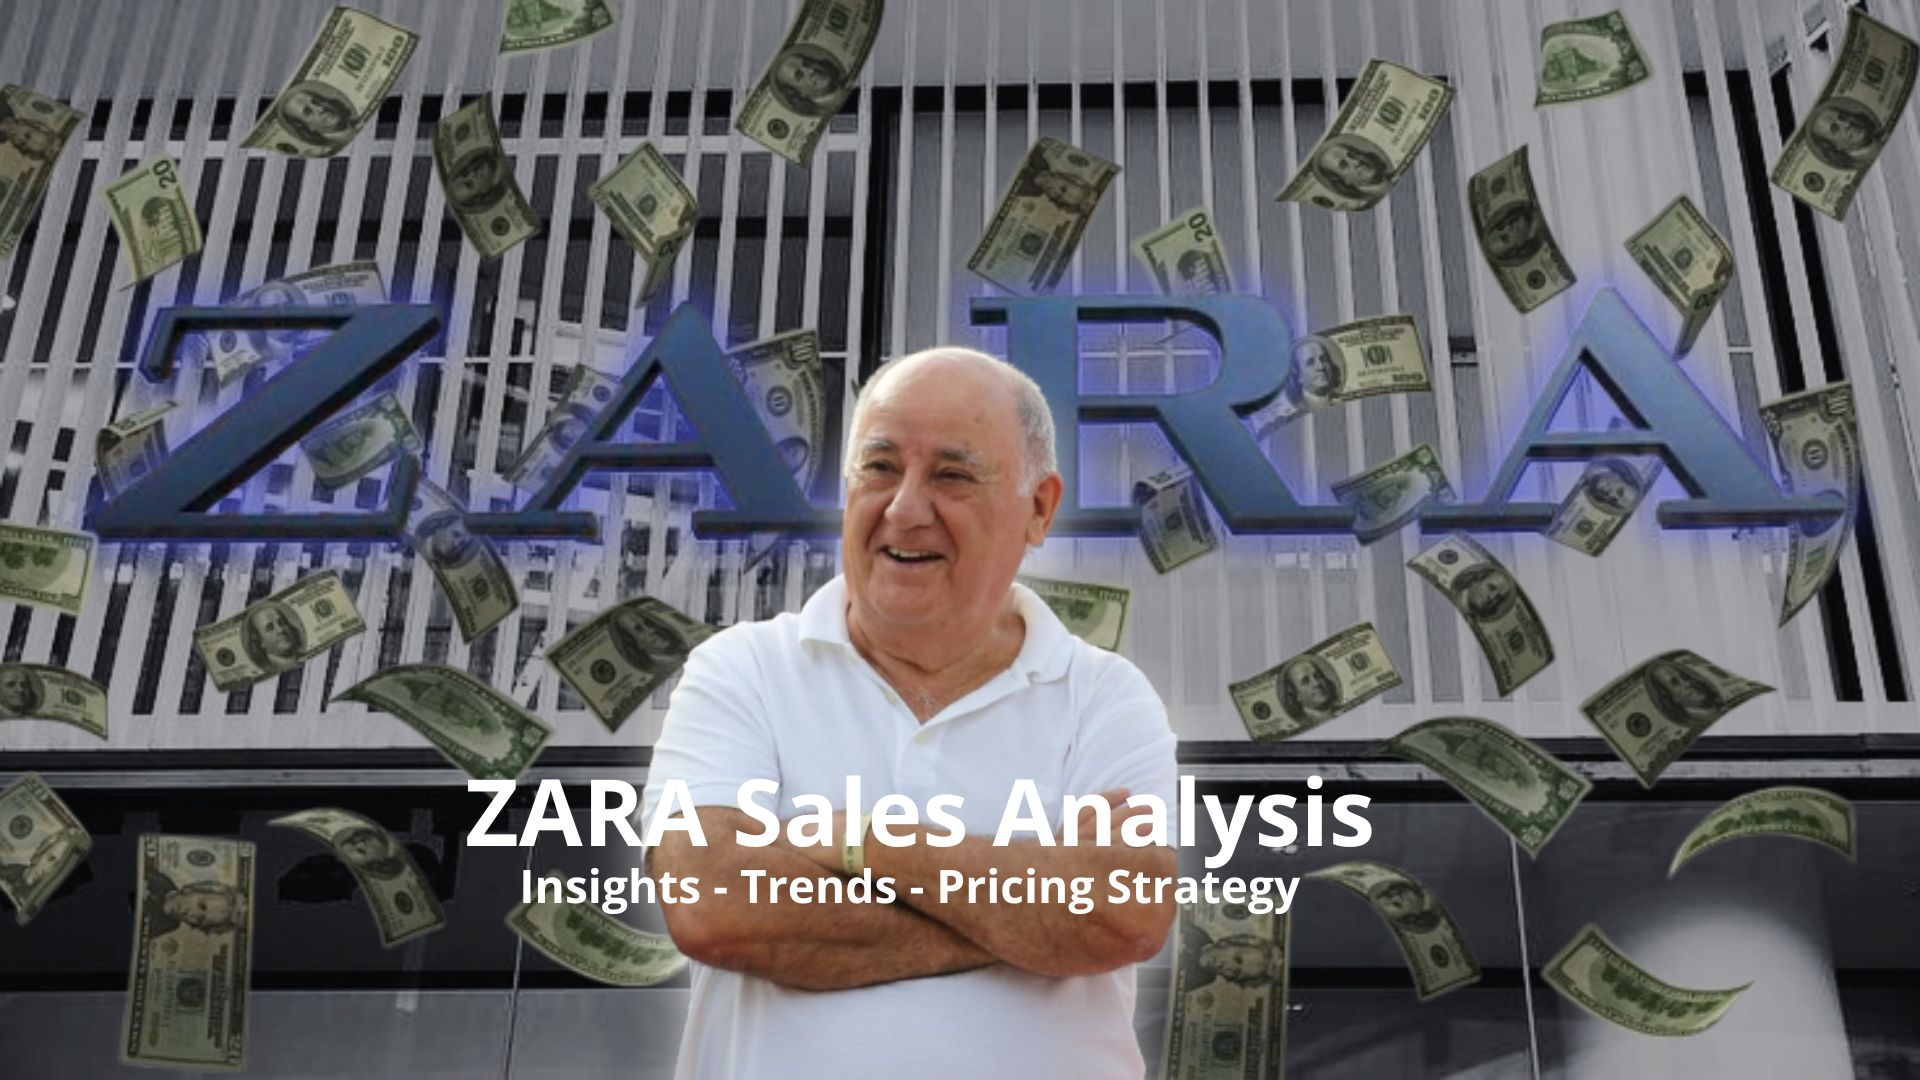

# **Importing Libraries ✅**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

### ***📅Load Dataset***

In [ ]:
data = pd.read_csv("Zara_Sales_Analysis.csv",delimiter=";")
data.head(5)

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [ ]:
data_info = data.info()
data_head = data.head()
data_columns = data.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

### ***🧹Data Handling & Cleaning***

In [ ]:
data.isna().sum()
data.dropna(inplace=True)
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [ ]:
data.head(6)

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN
5,117590,End-cap,No,Clothing,No,2968,Zara,https://www.zara.com/us/en/contrasting-collar-...,320298385-807-2,CONTRASTING COLLAR JACKET,Relaxed fit jacket. Contrasting lapel collar a...,79.90,USD,2024-02-19T08:50:09.140497,jackets,MAN


In [ ]:
data.rename(columns={"price": "price_usd"}, inplace=True)

In [ ]:
data.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name',
       'description', 'price_usd', 'currency', 'scraped_at', 'terms',
       'section'],
      dtype='object')

In [ ]:
data.drop(columns=["Product ID","url","sku","description","currency","brand",'scraped_at','Product Category'],inplace=True)

### ***Split Data Train & Test 🔪***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### ***🤖Training Model***

In [ ]:
rf_model = RandomForestRegressor()
lr_model = LinearRegression()
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### ***Evaluation Model 👨‍🏫***

In [ ]:
models = {
    "Random Forest": rf_model,
    "Linear Regression": lr_model,
    "XGBoost": xgb_model
}


In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"📌 {name}")
    print(f"📊 MAE: {mae:.2f}")
    print(f"📉 RMSE: {rmse:.2f}")
    print(f"📈 R² Score: {r2:.2f}\n")

📌 Random Forest
📊 MAE: 603.30
📉 RMSE: 714.86
📈 R² Score: -0.08

📌 Linear Regression
📊 MAE: 595.23
📉 RMSE: 693.10
📈 R² Score: -0.02

📌 XGBoost
📊 MAE: 641.60
📉 RMSE: 776.71
📈 R² Score: -0.27



In [ ]:
y_pred_rf = rf_model.predict(X_test)

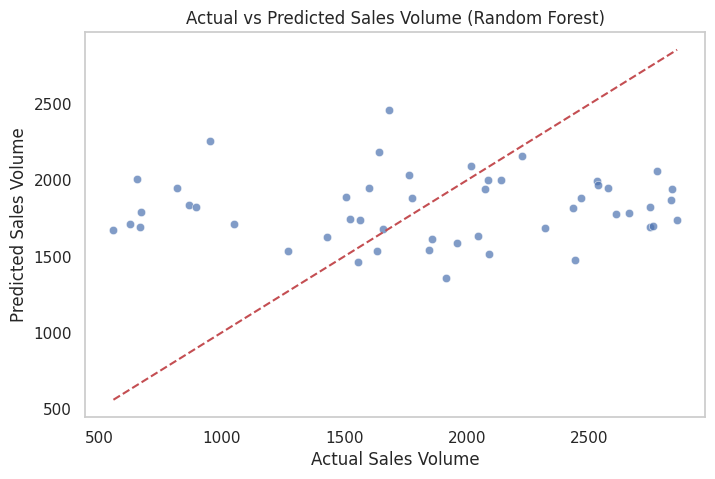

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.xlabel("Actual Sales Volume")
plt.ylabel("Predicted Sales Volume")
plt.title("Actual vs Predicted Sales Volume (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid()
plt.show()

### ***📔EDA & Visualization***

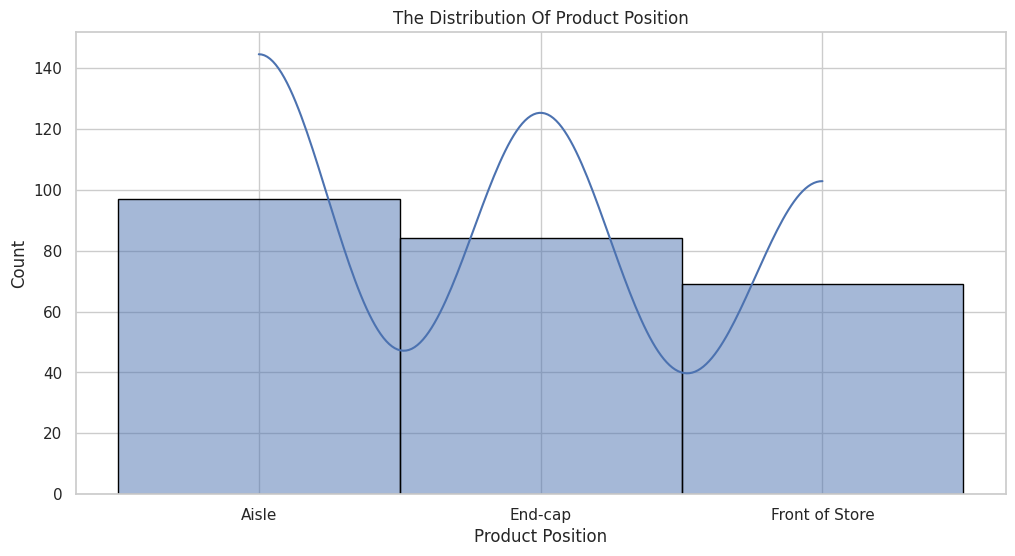

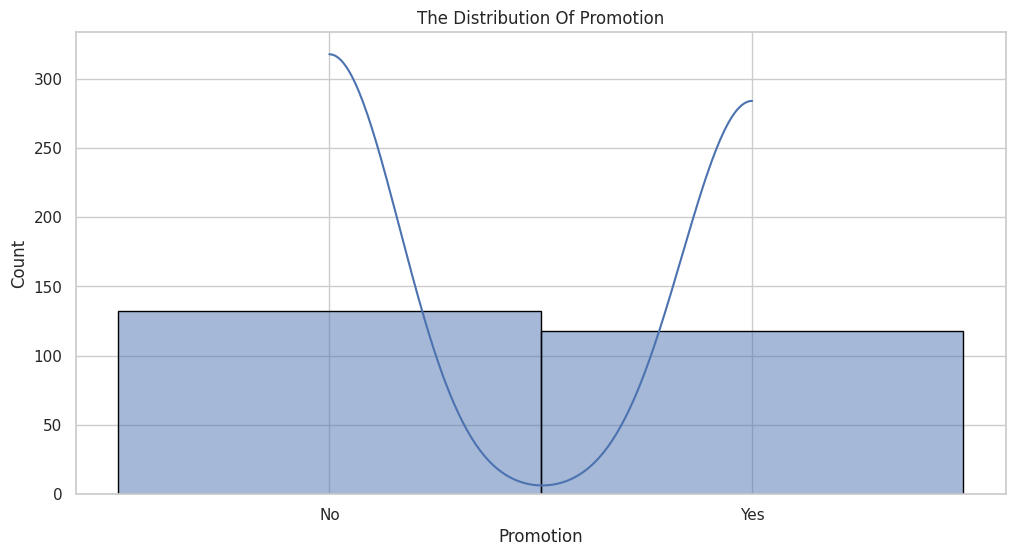

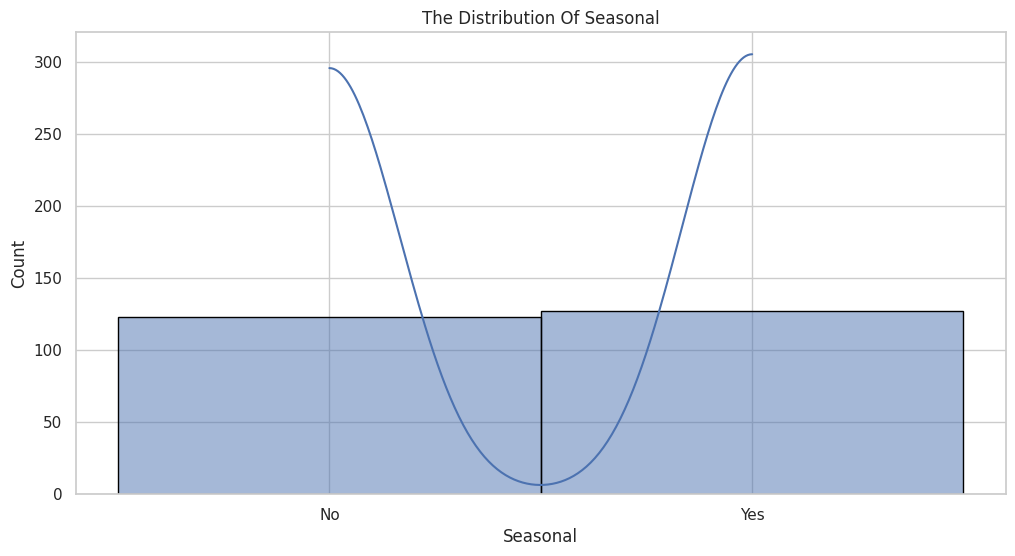

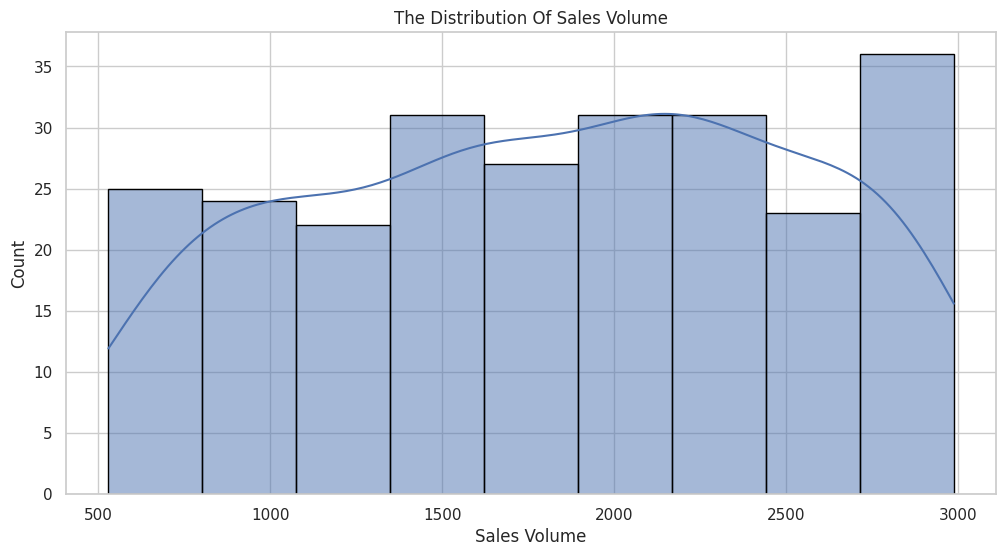

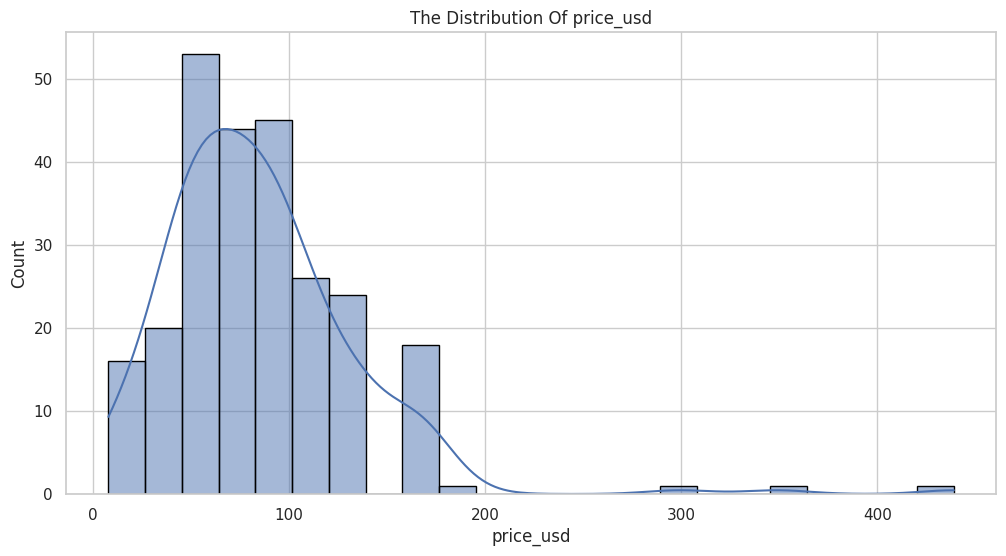

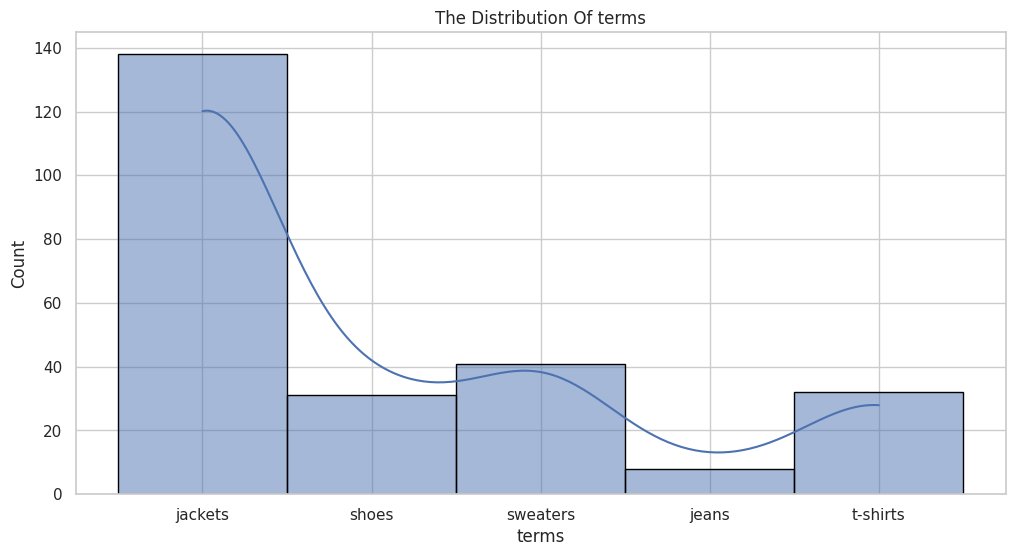

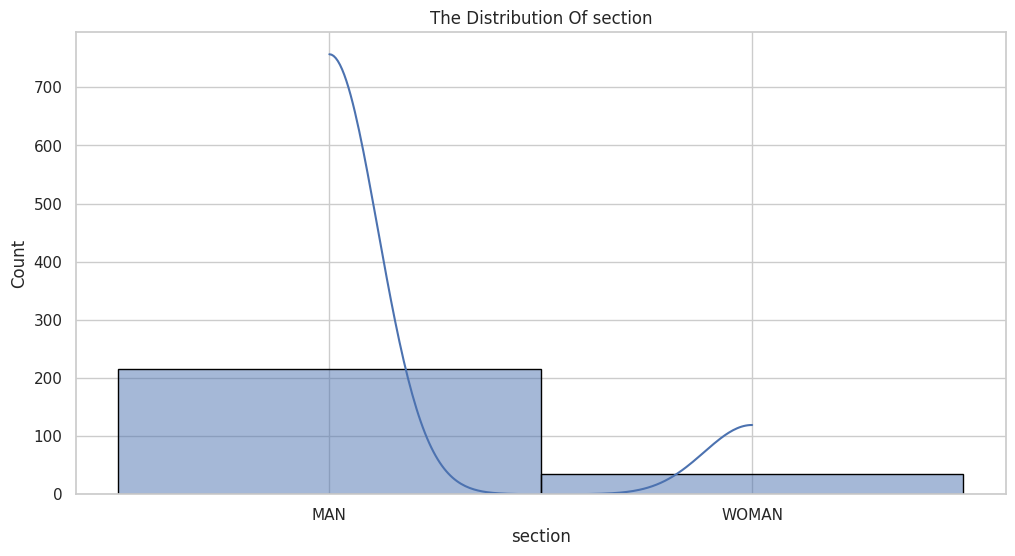

In [ ]:
for col in data.drop(columns=["name"]):
  plt.figure(figsize=(12, 6))
  sns.set_style('whitegrid')
  sns.histplot(data=data, x=col, kde=True, edgecolor='black')
  plt.title(f"The Distribution Of {col}")
  plt.show()

### ***📊 Product Price and Sales Summary Statistics***

<Axes: >

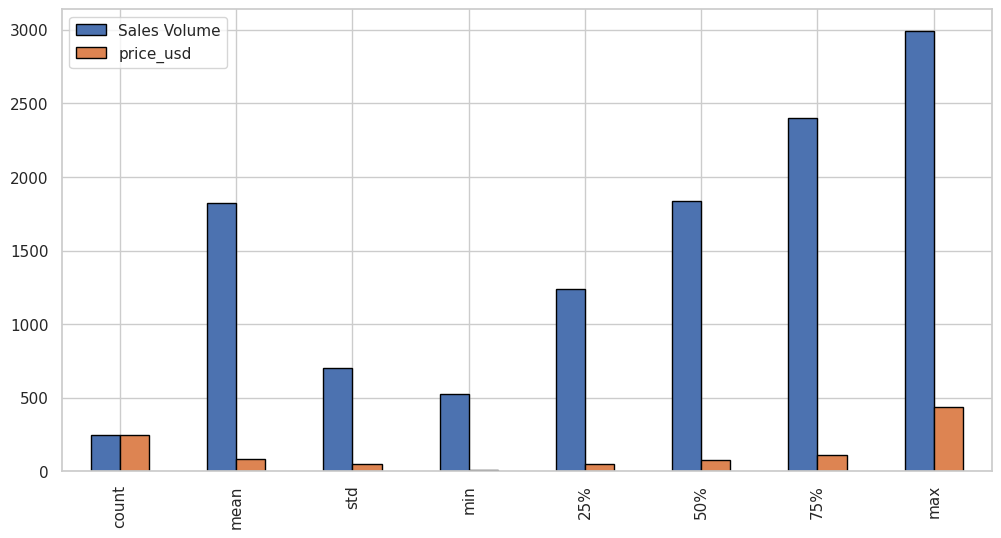

In [ ]:
data.describe().plot(kind="bar", figsize=(12,6), edgecolor="black")

### ***Highest Gender Seller Volume 👨👩***


In [ ]:
section_sales = data.groupby("section")["Sales Volume"].sum().reset_index()
section_sales = section_sales.sort_values(by="Sales Volume", ascending=False)
print(section_sales)

  section  Sales Volume
0     MAN        392182
1   WOMAN         63374


In [ ]:
sns.set(style="whitegrid")
section_sales = data.groupby("section")["Sales Volume"].sum().sort_values(ascending=False)

/tmp/ipython-input-183-2182049452.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=section_sales.values, y=section_sales.index, palette="Blues_d")


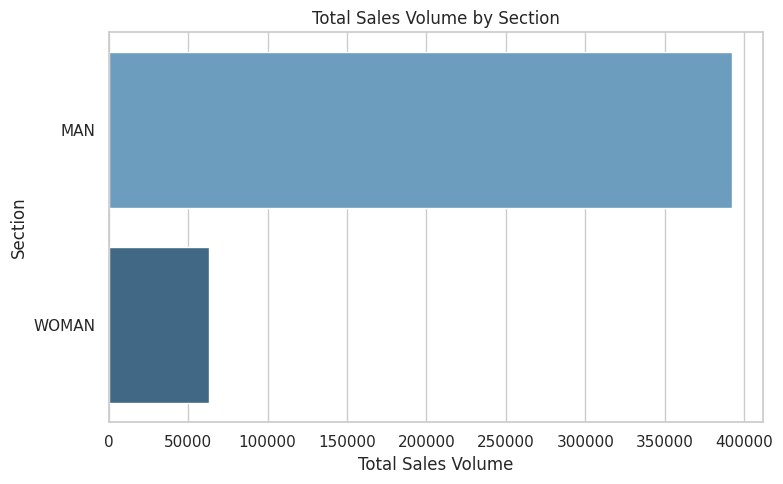

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=section_sales.values, y=section_sales.index, palette="Blues_d")
plt.title("Total Sales Volume by Section")
plt.xlabel("Total Sales Volume")
plt.ylabel("Section")
plt.tight_layout()
plt.show()

### ***🎯 The Influence of Promotion on the Relationship Between Price and Sales Volume***

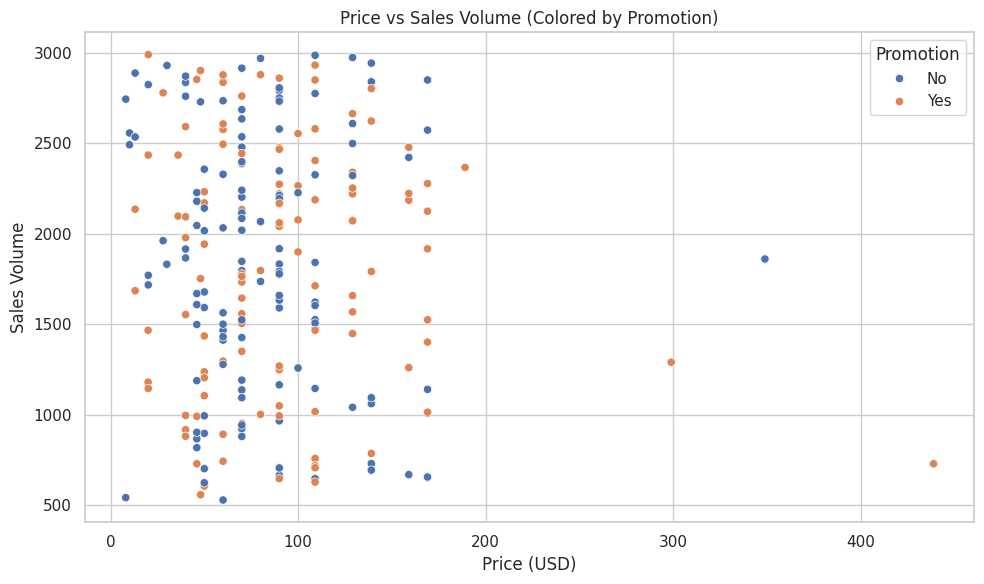

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="price_usd", y="Sales Volume", hue="Promotion")
plt.title("Price vs Sales Volume (Colored by Promotion)")
plt.xlabel("Price (USD)")
plt.ylabel("Sales Volume")
plt.tight_layout()
plt.show()

### ***👕 Comparison of Total Sales between Fashion Product Categories***

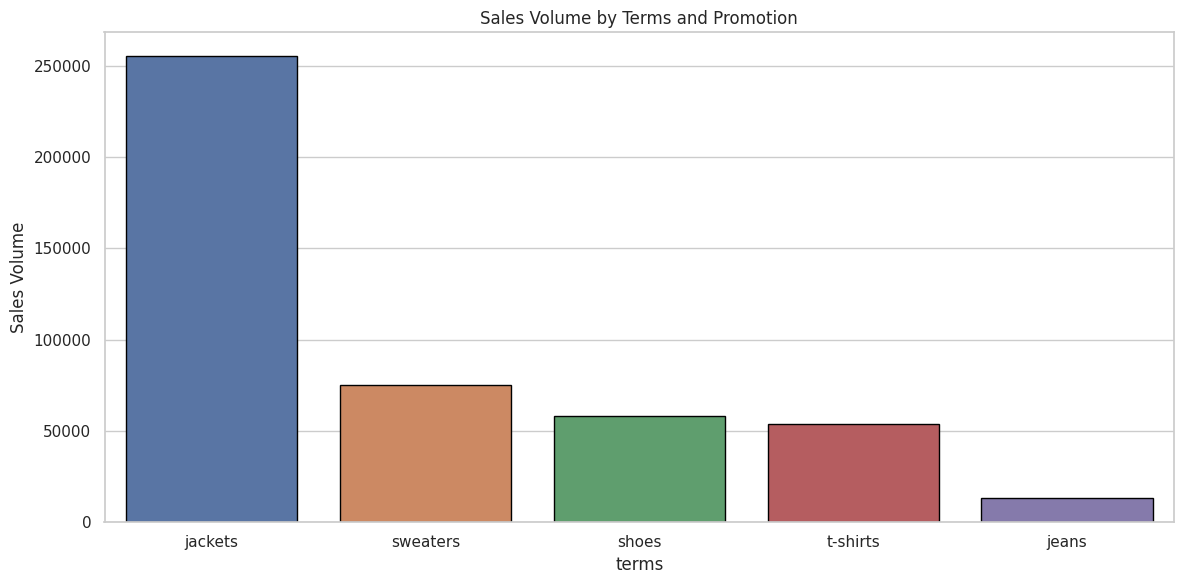

In [ ]:
classifi_sold=data.groupby("terms")["Sales Volume"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=classifi_sold, x="terms", y="Sales Volume", hue="terms", edgecolor="black")
plt.title("Sales Volume by Terms and Promotion")
plt.tight_layout()
plt.show()

### ***🏆 10 Best-Selling Products on the Market***

/tmp/ipython-input-186-3370580278.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y="name", x="Sales Volume", palette="viridis")


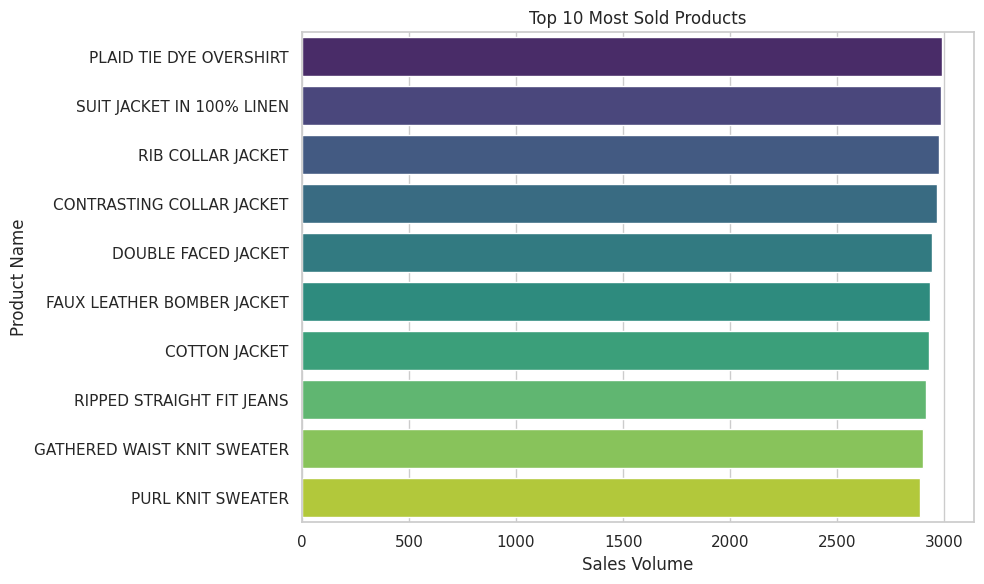

In [ ]:
top_10 = data.sort_values(by="Sales Volume", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, y="name", x="Sales Volume", palette="viridis")
plt.title("Top 10 Most Sold Products")
plt.xlabel("Sales Volume")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()